In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import lime
import lime.lime_tabular
import warnings
warnings.simplefilter('ignore')
from docx import Document
from docx.shared import Inches


In [2]:
fao_data = pd.read_csv("~/Documents/Kaleb-Bsc thesis/Crop yield and agricultural practices/datasets/latest0705.csv", index_col='Unnamed: 0')

fao_data

,Nutrient nitrogen N (total) - tonnes,Nutrient phosphate P2O5 (total) - tonnes,Nutrient potash K2O (total) - tonnes,Item,Yield(tonnes/ha),Fung & Bact – Benzimidazoles,"Fung & Bact – Diazines, morpholines",Fung & Bact – Dithiocarbamates,Fung & Bact – Inorganics,Fung & Bact – Other,...,Plant Growth Regulators-1,Plant Growth Regulators-2,Rodenticides – Other-1,Rodenticides – Other-2,Herbicides – Bipiridils-1,Herbicides – Bipiridils-2,Herbicides – Sulfonyl ureas-1,Herbicides – Sulfonyl ureas-2,Rodenticides – Anti-coagulants-1,Rodenticides – Anti-coagulants-2
1990-01-01,0.0,0.0,0.0,Apples,26.3272,0.0,0.0,0.0,0.0,0.0,...,1910.0,1910.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
1990-01-01,0.0,0.0,0.0,Apricots,2.5781,0.0,0.0,0.0,0.0,0.0,...,1910.0,1910.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
1990-01-01,0.0,0.0,0.0,Cherries,5.0828,0.0,0.0,0.0,0.0,0.0,...,1910.0,1910.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
1990-01-01,0.0,0.0,0.0,Currants,7.0383,0.0,0.0,0.0,0.0,0.0,...,1910.0,1910.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
1990-01-01,0.0,0.0,0.0,Gooseberries,6.8081,0.0,0.0,0.0,0.0,0.0,...,1910.0,1910.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01,0.0,0.0,0.0,Mixed grain,-5.8863,0.0,0.0,0.0,0.0,0.0,...,0.0,144.0,0.0,6.0,0.0,-84.0,0.0,4.0,0.1,0.1
2020-01-01,0.0,0.0,0.0,Oats,0.8941,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1
2020-01-01,0.0,0.0,0.0,Rye,0.9290,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1
2020-01-01,0.0,0.0,0.0,Triticale,0.4421,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1


In [3]:
cat_names = fao_data['Category'].unique()
cat_names

array(['Fruits and Nuts', 'Vegetables and Legumes', 'Cereals'],
      dtype=object)

Intercept 5.5760891093005025
Prediction_local [16.56509751]
Right: 17.82351427102204


,Features_Fruits and Nuts,Coeffcients (GBR)_Fruits and Nuts
0,0.00 < Spring <= 1.00,6.246078
1,Fall <= 0.00,4.481540
2,"Fung & Bact – Triazoles, diazoles-1 <= 0.50",-2.252086
3,Herbicides – Amides-2 <= 0.48,1.737847
4,Herbicides – Sulfonyl ureas-2 <= 0.50,1.619666
5,Fung & Bact – Other-2 <= 0.50,1.294253
6,0.17 < Yield(tonnes/ha)-1 <= 0.28,-1.072340
7,Herbicides – Amides <= 0.48,-1.003477
8,Fung & Bact – Benzimidazoles <= 0.51,-0.990017
9,Rodenticides – Other-1 <= 0.50,0.927544


Intercept 4.537223319413895
Prediction_local [85.28275373]
Right: 212.22182842241776


,Features_Vegetables and Legumes,Coeffcients (GBR)_Vegetables and Legumes
0,Summer > 0.00,63.454566
1,Yield(tonnes/ha)-1 > 0.38,15.313367
2,0.04 < Yield(tonnes/ha)-2 <= 0.20,9.770079
3,Insecticides – Other-2 <= 0.43,-6.737758
4,Herbicides – Phenoxy hormone products <= 0.52,-6.067581
5,"Fung & Bact – Triazoles, diazoles <= 0.50",4.931305
6,Insecticides – Organo-phosphates <= 0.51,4.870275
7,Herbicides – Amides-2 <= 0.49,-4.451859
8,Herbicides – Sulfonyl ureas-2 > 0.42,-4.088433
9,Herbicides – Triazines-2 <= 0.49,3.751570


Intercept -1.1564836999503776
Prediction_local [0.95703469]
Right: 1.420744991278227


,Features_Cereals,Coeffcients (GBR)_Cereals
0,0.54 < Yield(tonnes/ha)-1 <= 0.64,1.345878
1,Summer <= 0.00,-0.888477
2,0.00 < Fall <= 1.00,0.550800
3,Herbicides – Urea derivates-1 <= 0.52,0.537557
4,Herbicides – Bipiridils-1 <= 0.51,-0.533110
5,Insecticides – Botanical products and biologic...,0.437853
6,Fung & Bact – Inorganics <= 0.50,0.356997
7,Herbicides – Carbamates-2 <= 0.51,0.319413
8,Nutrient nitrogen N (total) - tonnes <= 0.51,-0.218837
9,Nutrient phosphate P2O5 (total) - tonnes <= 0.53,0.205445


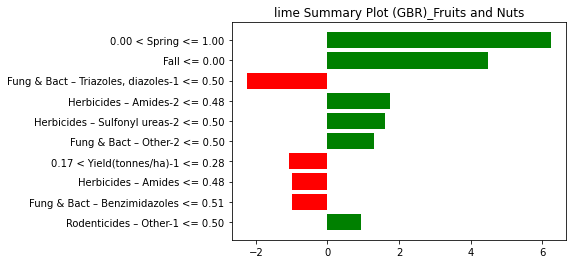

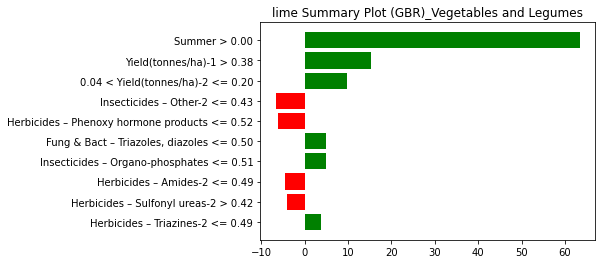

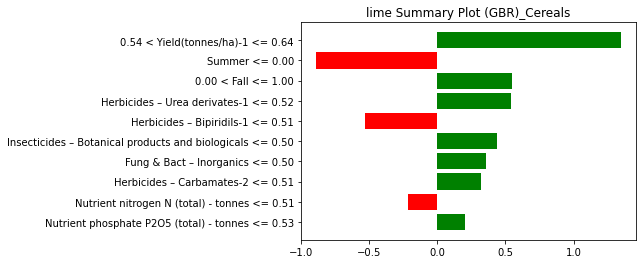

In [5]:
doc = Document()
scaler = MinMaxScaler()
for cat in cat_names:
    crop_df = fao_data[fao_data['Category'] == cat]
    encoded_df = pd.get_dummies(crop_df[["Crop_season"]], prefix='', prefix_sep='')
    encoded_df = encoded_df.drop(encoded_df.columns[-2], axis=1)
    y = crop_df[['Yield(tonnes/ha)']]
    x = crop_df.drop(['Yield(tonnes/ha)', "Item", "Category", "Crop_season"], axis=1)
    x = pd.concat([x, encoded_df], axis=1)
    mean = x.mean()
    std = x.std()
    lower_bound = mean - 2 * std
    upper_bound = mean + 2 * std
    x = x.clip(lower_bound, upper_bound, axis=1)
    x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
    regressor = GradientBoostingRegressor(n_estimators=500, learning_rate= 0.5)
    regressor.fit(x_train, y_train)


    #prediction of new value
    y_pred = regressor.predict(x_test)
    #prediction of new value
    y_pred = regressor.predict(x_test)
    explainer = lime.lime_tabular.LimeTabularExplainer(np.array(x_train),
                    feature_names=pd.DataFrame(x_test).columns, 
                    class_names=['Yield(tonnes/ha)'], verbose=True, mode='regression')
    exp = explainer.explain_instance(pd.DataFrame(x_test).iloc[-1], 
     regressor.predict, num_features=10)
    exp_list = exp.as_list()
    exp_list = [(feat, abs(coeff)) for feat, coeff in exp_list] # add absolute value of coefficients
    exp_list.sort(key=lambda x: x[1], reverse=True)
    exp.as_pyplot_figure()
    plt.title("lime Summary Plot (GBR)_" + cat)
    display(pd.DataFrame(exp.as_list(),  columns=['Features_' + cat, 'Coeffcients (GBR)_' + cat]))

    
    # create a table for Lime results
    table = doc.add_table(rows=1, cols=2)
    hdr_cells = table.rows[0].cells
    hdr_cells[0].text = 'Features_' + cat
    hdr_cells[1].text = 'Coefficients (GBR)_' + cat
    
    for feature, coefficient in exp.as_list():
        row_cells = table.add_row().cells
        row_cells[0].text = str(feature)
        row_cells[1].text = str(coefficient)

    # add a page break
    doc.add_page_break()

# save the Word document
doc.save('lime_results_GBR.docx')
